# Final Project


# Title: Mental Classification Treatment

*Objective*

The objective of this project is to create a classification model to to predict if mentaly ill person in United States and United Kingdm are treated.

*What are the steps?*

The following are the steps to undertake in order to reach the final goal of the project.

1. Read data.

2. Data explatory and cleaning.

3. Split data into train and split.

4. Train model.

5. Evaluate model.

6. Conclusion.

We will need the following columns to predict :

column_required = ['Age', 'Gender', 'Country','family_history','treatment']
We will choose age from 5 years old since most people in US and UK start working as actresses and actors at the age of 7 years.

https://www.kaggle.com/datasets/osmi/mental-health-in-tech-survey

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
location = 'https://raw.githubusercontent.com/Mbicha/data_science/main/data/locatio1.csv'
treatment = 'https://raw.githubusercontent.com/Mbicha/data_science/main/data/treatment.json'
survey = './survey.csv'

In [6]:
class MentalHealthTreatment:
    """Module to predict treatment of mental illness"""
    
    def data_to_use(self,data_source1,data_source2,data_source3):
        """
        Parameters
        ==========
        data_source1: csv
            This data is in csv form
        data_source2: csv
            This data is in csv form
        data_source3: json
            The raw data is in json form
        ==========
        Return
        ==========
        get three daframe at the end
        """
        dataframe_1 = pd.read_csv(data_source1)
        dataframe_2 = pd.read_csv(data_source2)
        dataframe_3 = pd.read_json(data_source3)
        return dataframe_1, dataframe_2, dataframe_3

    def merge_all_datasets(self, dataframe1, dataframe2, dataframe3):
        """
        Parameters
        ==========
        dataframe1: Dataframe
            In form of dataframe
        dataframe2: Dataframe
            In form of dataframe
        dataframe3: Dataframe
            In form of dataframe
        ==========
        Return
        ==========
        Resulting dataframe of is merge of the 3
        """
        mrg = pd.merge(left=dataframe1, right=dataframe2, on=['Timestamp', 'Timestamp'])
        return pd.concat([mrg, dataframe3['treatment']], axis=1)

    def get_uk_us_df(self, dataframe):
        """
        Parameters
        ==========
        dataframe1: Dataframe
            In form of dataframe
        ==========
        Return
        ==========
        Resulting dataframe
        """
        return dataframe[
            ((dataframe['Country'] == 'United States') | (dataframe['Country'] == 'United Kingdom')) & 
            (dataframe['Age'] > 5)]
    
    def check_missing_values(self, dataframe):
        """
        Parameters
        ==========
        dataframe1: Dataframe
            In form of dataframe
        ==========
        Return
        ==========
        dictionary consisting missing values greater than 0
        """
        missing_dict = {}
        for i in dataframe.columns:
            missing = round(np.mean(dataframe[i].isna())*100)
            if missing > 0:
                missing_dict[i] = missing
        return missing_dict

    def remove_unwanted_cols(self, dataframe, cols_lst):
        """
        Parameters
        ==========
        dataframe1: Dataframe
            In form of dataframe
        cols_lst: List
            List of columns to drop from the dataframe
        ==========
        Return
        ==========
        Dataframe with dropped columns
        """
        return dataframe.drop(cols_lst, axis=1)
    
    def fill_na(self, dataframe, col):
        """Fill na with mode since most of columns are categorical"""
        return dataframe.fillna(dataframe[col].mode()[0])

    def get_dummies_data(self, dataframe, col):
        """
        Convert to dummy
        ============
        dataframe:
            dataframe datatype
        col:
            column to convert to dummy
        ============
        Return  dataframe with dummy variable
        """
        dataframe = pd.get_dummies(data=dataframe, columns = [col],drop_first = True)
        return dataframe

    def replace_values(self, dataframe, col, oldvalue, newvalue):
        """
        Parameters
        ==========
        dataframe1: Dataframe
            In form of dataframe
        cols: col
            Column from with values to replace
        oldvalue: Any
            Value of any datatype
        newvalue: Any
            Value of any datatype
        ==========
        Return
        ==========
        Dataframe with values changed
        """
        dataframe[col].mask(dataframe[col] == oldvalue, newvalue, inplace=True)
        return dataframe

    def plot_bar(self, dataframe, x, y):
        """
        Parameters
        ==========
        dataframe1: Dataframe
            In form of dataframe
        x: col
            Column x
        y: col
            Column y
        ==========
        Return
        ==========
        Bar plot of passed values
        """
        plt.figure(figsize=(10, 5))
        plt.title(f"Relationshibe between {x} and {y}", weight='bold')
        sns.barplot(data=dataframe, x=x, y=y)
        plt.show()

    def plot_count(self, dataframe, x):
        """
        Parameters
        ==========
        dataframe1: Dataframe
            In form of dataframe
        x: col
            Column x
        ==========
        Return
        ==========
        Count plot of passed values
        """
        plt.figure(figsize=(10, 5))
        plt.title(f"Count {x}", weight='bold')
        sns.countplot(data=dataframe, x=x)
        plt.show()

    def create_model(self, dataframe, col):
        """
        Parameters
        ==========
        dataframe1: Dataframe
            In form of dataframe
        col:
            Column to either drop or select
        ==========
        Return
        ==========
        train and test
        """
        X = dataframe.drop([col], axis=1)
        y = dataframe[col]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
        model = LogisticRegression(max_iter=2000)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        return y_test,y_pred

    def model_accuracy(self, actual_y, y_pred):
        """
        Parameters
        ==========
        actual_y: numpy arry

        y_pred: numby array

        ==========
        Return
        ==========
        score: float
            Float
        """
        score = accuracy_score(actual_y, y_pred)
        return f"{round(score*100,2)}%"

Create an object of class MentalHealthTreatmen

In [74]:
mh = MentalHealthTreatment()

Read data and store in 3 dataframes

In [8]:
df, df2, df3 = mh.data_to_use(location, survey, treatment)

Merge dataframes together and return a new large dataset

In [9]:
mental_df = mh.merge_all_datasets(df, df2, df3)

Select dataframe where a country is United State or United Kingdom

In [10]:
mental_df = mh.get_uk_us_df(mental_df)

In [11]:
mental_df.head(3)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,work_interfere,no_employees,remote_work,...,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,treatment
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Often,6-25,No,...,No,Maybe,Yes,No,NaN,NaN,NaN,NaN,NaN,Yes
1,2014-08-27 11:29:37,44,Male,United States,IN,NaN,No,Rarely,More than 1000,No,...,No,No,Don't know,No,NaN,NaN,NaN,NaN,NaN,No
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Often,26-100,No,...,Maybe,Maybe,No,Yes,NaN,NaN,NaN,NaN,NaN,Yes


In [12]:
mh.check_missing_values(mental_df)

{'state': 21.0,
 'self_employed': 1.0,
 'work_interfere': 20.0,
 'comments': 87.0,
 'Unnamed: 22': 100.0,
 'Unnamed: 23': 100.0,
 'Unnamed: 24': 100.0,
 'Unnamed: 25': 100.0,
 'treatment': 2.0}

From the above, we only need need treatment columns, drop the following 

['state', 'self_employed', 'work_interfere', 'comments', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25']

Remove unwanted columns

In [13]:
# column_required = ['Age', 'Gender', 'Country','State','family_history','treatment']
column_to_remove = ['Timestamp', 'state','self_employed','work_interfere', 'no_employees', 'remote_work',
       'tech_company', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25']

In [14]:
mental_df = mh.remove_unwanted_cols(mental_df, column_to_remove)
mental_df.head(5)

,Age,Gender,Country,family_history,treatment
0,37,Female,United States,No,Yes
1,44,Male,United States,No,No
3,31,Male,United Kingdom,Yes,Yes
4,31,Male,United States,No,No
5,33,Male,United States,Yes,No


In [15]:
mh.check_missing_values(mental_df)

{'treatment': 2.0}

Fill Missing Values

For this we are going to fill all missing value with mode of the column. This is because most of missing value lie on categorical columns.

In [16]:
cleaned_mental_df = mh.fill_na(mental_df, 'treatment')
mh.check_missing_values(cleaned_mental_df)

{}

In [17]:
cleaned_mental_df.head(4)

,Age,Gender,Country,family_history,treatment
0,37,Female,United States,No,Yes
1,44,Male,United States,No,No
3,31,Male,United Kingdom,Yes,Yes
4,31,Male,United States,No,No


In [18]:
cleaned_mental_df['Gender'].unique()

array(['Female', 'Male', 'Femake', 'femail'], dtype=object)

We can see that there are some mistakes on Femake and femail. For this we will need to replace this values.

In [19]:
cleaned_mental_df = mh.replace_values(
    cleaned_mental_df, 'Gender', 'Femake', 'Female'
)

In [20]:
cleaned_mental_df = mh.replace_values(
    cleaned_mental_df, 'Gender', 'femail', 'Female'
)

In [21]:
cleaned_mental_df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

Aggregations

In [22]:
cleaned_mental_df['family_history'].value_counts()

No     559
Yes    394
Name: family_history, dtype: int64

In [23]:
cleaned_mental_df['treatment'].value_counts()

Yes    498
No     455
Name: treatment, dtype: int64

From above summary of value count on family history and treatment;

We can see that most cases came from the families without history of mental illness and most mentally ill people were treated.

**Data Visualization**

For visulaization I had done the age group of mental health group acroos the United States and United Kingdom

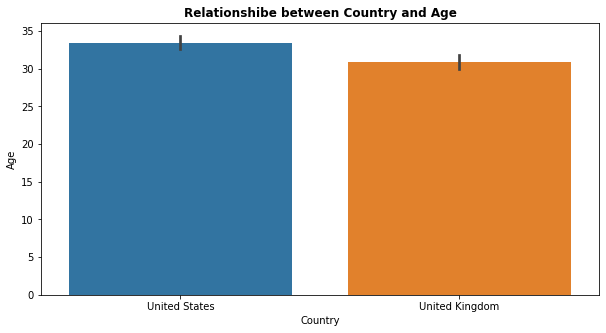

In [24]:
mh.plot_bar(cleaned_mental_df,'Country', 'Age')

In this graph I plotted Gender count of males and females 

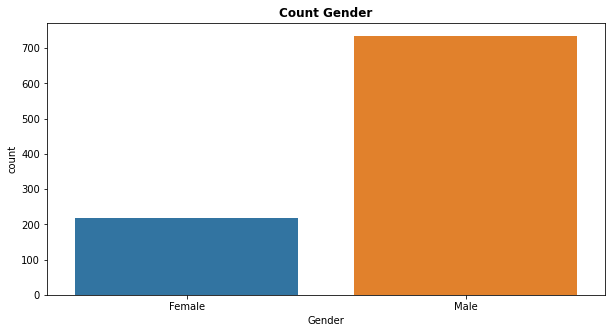

In [25]:
mh.plot_count(cleaned_mental_df, 'Gender')

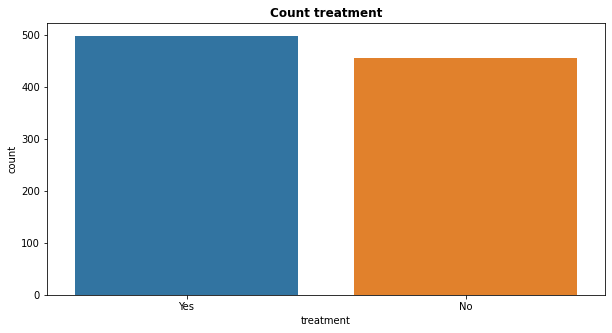

In [26]:
mh.plot_count(cleaned_mental_df, 'treatment')

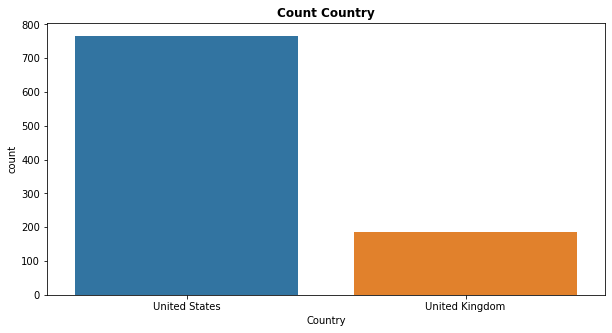

In [27]:
mh.plot_count(cleaned_mental_df, 'Country')

Let's Change Gender, Country, family_history, treatment to dummy for easier use in predicting.

In [28]:
final_mental_df = mh.get_dummies_data(cleaned_mental_df, 'Gender')

Age (Male - 1, Female - 0)

Country (United States - 1, United Kingdom - 0)

FamilyHistory (Mental illness -1, no mental illness - 0)

Treatment (treated - 1, not-treated - 0)

In [29]:
final_mental_df = mh.get_dummies_data(final_mental_df, 'Country')
final_mental_df = mh.get_dummies_data(final_mental_df, 'family_history')
final_mental_df = mh.get_dummies_data(final_mental_df, 'treatment')
final_mental_df.head()

,Age,Gender_Male,Country_United States,family_history_Yes,treatment_Yes
0,37,0,1,0,1
1,44,1,1,0,0
3,31,1,0,1,1
4,31,1,1,0,0
5,33,1,1,1,0


Rename Column names

In [30]:
final_mental_df.columns

Index(['Age', 'Gender_Male', 'Country_United States', 'family_history_Yes',
       'treatment_Yes'],
      dtype='object')

In [31]:
final_mental_df.rename(
    columns = {
        'Gender_Male':'Gender',
        'Country_United States': 'Country',
        'family_history_Yes': 'FamilyHistory',
        'treatment_Yes': 'Treatment'
        }, inplace = True
    )

In [38]:
final_mental_df

,Age,Gender,Country,FamilyHistory,Treatment
0,37,0,1,0,1
1,44,1,1,0,0
3,31,1,0,1,1
4,31,1,1,0,0
5,33,1,1,1,0
...,...,...,...,...,...
1280,26,1,0,0,1
1281,32,1,1,1,1
1282,34,1,1,1,1
1283,46,0,1,0,1


In [76]:
def alter(value):
    if value == "Female" :
        return 'F'
    if value == "Male":
        return 'M'

In [77]:
mental_df.head()

,Age,Gender,Country,family_history,treatment
0,37,Female,United States,No,Yes
1,44,Male,United States,No,No
3,31,Male,United Kingdom,Yes,Yes
4,31,Male,United States,No,No
5,33,Male,United States,Yes,No


In [83]:
mental_df["Age"] = mental_df["Age"].astype('int64')
mental_df["Age"] = mental_df["Age"].astype('int64')

In [99]:
mentalDfGrpByCountry = mental_df.groupby(['Country']).count()
display(mentalDfGrpByCountry)

,Age,Gender,family_history,treatment
Country,,,,
United Kingdom,187,0,187,183
United States,766,0,766,753


In [103]:
mentalDfGrpByTreatment = mental_df.groupby(['treatment']).count()
display(mentalDfGrpByTreatment)

,Age,Gender,Country,family_history
treatment,,,,
No,455,0,455,455
Yes,481,0,481,481


**Conclusion**

When we compare the mental illness in United States and United Kingdom, we conclude that United States has more mentally people than United Kingdom.

The treatment given to the patient can be given to others if there is a similar one if needed the same gender.

The information is very sensitive data,must be protected and that can be shared only to hospitals only.

As I am learning still, my goal in future is to provide common website encrypted, which the patients info and treatment only given access to hospitals, I know its a very tough one but I have an interest in this when I get more experience.  